<a href="https://colab.research.google.com/github/VictoryChianumba/yt-java-game/blob/master/Linear_Regreassion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
players = pd.read_csv("players_22.csv")

<ipython-input-3-08b1a8bf1ee9>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


In [4]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]
players = players.dropna(subset=features)

data = players[features].copy()

In [5]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


In [6]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [7]:
data

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667
...,...,...,...,...,...
19234,1.000000,1.586957,1.012876,1.002830,3.000000
19235,1.000000,2.956522,1.000000,1.004686,2.000000
19236,1.000000,2.173913,1.000000,1.004222,2.666667
19237,1.000000,3.152174,1.000000,1.004686,2.000000


In [8]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [10]:
def random_centroids(data, k):
  centroids = []
  for i in range(k):

    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)

  return pd.concat(centroids, axis=1)

In [16]:
centroids = random_centroids(data, 5)

In [17]:
centroids

,0,1,2,3,4
overall,3.543478,3.934783,5.500000,1.586957,3.739130
potential,5.108696,4.521739,5.695652,6.282609,7.847826
wage_eur,1.006438,1.038627,1.038627,1.141631,1.002575
value_eur,1.018140,1.078452,3.690429,1.023939,1.015820
age,5.000000,5.000000,5.000000,3.333333,3.000000


In [18]:
def get_labels(data, centroids):
  distances = centroids.apply( lambda x: np.sqrt(((data - x) ** 2).sum(axis = 1)))
  return distances.idxmin(axis = 1)



In [19]:
labels = get_labels(data, centroids)

In [20]:
labels.value_counts()

1    9602
4    3916
3    2217
2    2047
0    1383
dtype: int64

In [21]:
def new_centroids(data, labels, k):
  data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [23]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components = 2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.fit_transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration{iteration}')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()

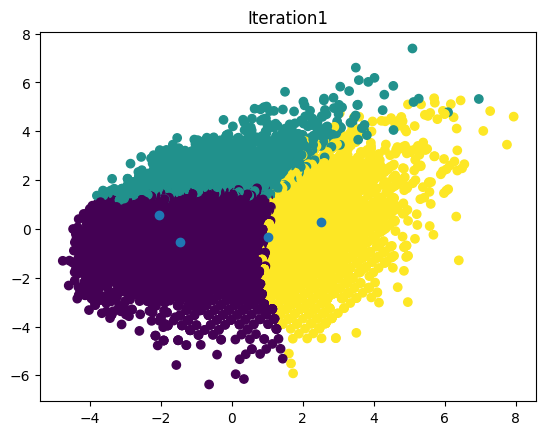

In [29]:
max_iterations = 100
k = 4
centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()

iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids

  labels = get_labels(data, centroids)
  centriods = new_centroids(data, labels, k)
  plot_clusters(data, labels, centroids, iteration)
  iteration += 1
